In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


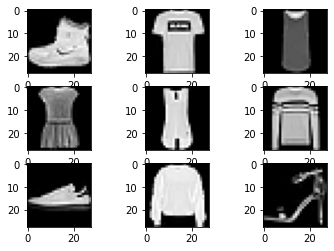

In [2]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.subplot(3,3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis()


In [3]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255 - 0.0)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5290 - accuracy: 0.8161 - val_loss: 0.4491 - val_accuracy: 0.8442
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4000 - accuracy: 0.8570 - val_loss: 0.4066 - val_accuracy: 0.8557
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3564 - accuracy: 0.8723 - val_loss: 0.3826 - val_accuracy: 0.8652
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3266 - accuracy: 0.8815 - val_loss: 0.3447 - val_accuracy: 0.8767
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3078 - accuracy: 0.8877 - val_loss: 0.3423 - val_accuracy: 0.8770
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2928 - accuracy: 0.8910 - val_loss: 0.3480 - val_accuracy: 0.8712
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2800 - accuracy: 0.8966 - val_loss: 0.3283 - val_accuracy:

In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.3545 - accuracy: 0.8807


[0.35445326566696167, 0.8806999921798706]

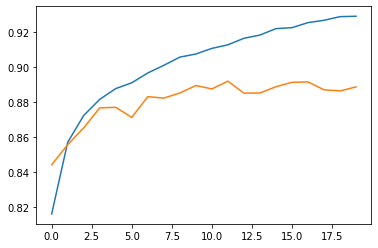

In [9]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.title('accuracy trend')

plt.legend()

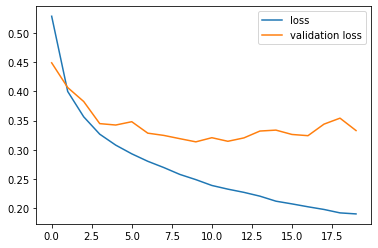

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.title('loss trend')

plt.legend()

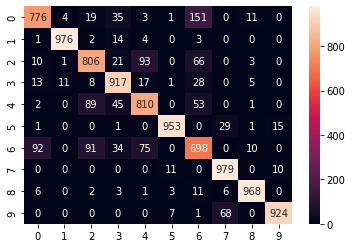

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = model.predict(X_test)

cm = confusion_matrix(y_test, np.argmax(pred, axis=1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

- T-shirt/top: 0
- Trouser: 1
- Pullover: 2
- Dress: 3
- Coat: 4
- Sandal: 5
- Shirt: 6, accuracy: 69.8%
- Sneaker: 7, accuracy: 97.9
- Bag: 8
- Ankle boot: 9

모델은 Shirt를 햇갈려한다.